## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

In [25]:
### You code here

import pandas as pd

df_1 = pd.read_csv("C:\\Users\\lalit\\Downloads\\portfolio_data.csv")

In [23]:
df_1.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


RMSE score is 75.95494360016615
R2 Score is 0.9783453724222465


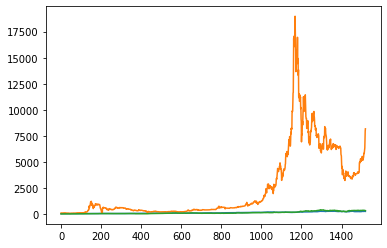

In [33]:
x = df_1.drop(['Date', 'AMZN'], axis = 1)
y = df_1['AMZN']
import matplotlib.pyplot as plt
plt.plot(x)
#split the  data in train and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.35, random_state = 0)

lm = LinearRegression()
lm.fit(xtrain, ytrain)

ypred = lm.predict(xtest)
print("RMSE score is",np.sqrt(mean_squared_error(ytest, ypred)))
print("R2 Score is", r2_score(ytest, ypred))

In [27]:
from sklearn.ensemble import RandomForestRegressor

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)
rfreg = RandomForestRegressor(random_state=211)
rfreg.fit(xtrain, ytrain)

rfregpred = rfreg.predict(xtest)
print("RMSE score is",np.sqrt(mean_squared_error(ytest, rfregpred)))
print("R2 Score is", r2_score(ytest, rfregpred))

RMSE score is 29.030881296523003
R2 Score is 0.9968733510365456


In [29]:
pip install keras

     ---------------------------------------- 1.4/1.4 MB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\lalit\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install tensorflow

     -------------------------------------- 438.0/438.0 MB 3.2 MB/s eta 0:00:00
     --------------------------------------- 13.9/13.9 MB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 3.4/3.4 MB 11.5 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 8.1 MB/s eta 0:00:00
     ------------------------------------- 462.5/462.5 KB 14.6 MB/s eta 0:00:00
     -------------------------------------- 126.7/126.7 KB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 KB 2.2 MB/s eta 0:00:00
     ------------------------------------- 903.8/903.8 KB 11.5 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 KB ? eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 12.7 MB/s eta 0:00:00
     ------------------------

You should consider upgrading via the 'C:\Users\lalit\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [49]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(xtrain, ytrain, batch_size=1, epochs=10)

Epoch 1/10
988/988 [==============================] - 10s 5ms/step - loss: 380361.0625
Epoch 2/10
988/988 [==============================] - 5s 5ms/step - loss: 18583.7598
Epoch 3/10
988/988 [==============================] - 5s 5ms/step - loss: 8266.8477
Epoch 4/10
988/988 [==============================] - 5s 5ms/step - loss: 7623.1235
Epoch 5/10
988/988 [==============================] - 5s 5ms/step - loss: 8131.7554
Epoch 6/10
988/988 [==============================] - 5s 5ms/step - loss: 7540.5181
Epoch 7/10
988/988 [==============================] - 5s 5ms/step - loss: 7094.6465
Epoch 8/10
988/988 [==============================] - 5s 5ms/step - loss: 6651.8096
Epoch 9/10
988/988 [==============================] - 5s 5ms/step - loss: 7371.8579
Epoch 10/10
988/988 [==============================] - 5s 5ms/step - loss: 7644.6382


### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

In [6]:
### You code here:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re

df = pd.read_csv("C:\\Users\\lalit\\Desktop\\5502\\train.csv\\train.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [36]:
hate_df = df[df.label == 1]
hate_df.head()

,id,label,tweet,processed_tweets
13,14,1,@user #cnn calls #michigan middle school 'buil...,cnn calls michigan middle school build the wal...
14,15,1,no comment! in #australia #opkillingbay #se...,no comment in australia opkillingbay seashephe...
17,18,1,retweet if you agree!,retweet if you agree
23,24,1,@user @user lumpy says i am a . prove it lumpy.,lumpy says i am a prove it lumpy
34,35,1,it's unbelievable that in the 21st century we'...,it s unbelievable that in the 21st century we ...


In [37]:
normal_df = df[df.label == 0]
normal_df.head()

,id,label,tweet,processed_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [9]:
def process_tweet(tweet):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

In [10]:
df['processed_tweets'] = df['tweet'].apply(process_tweet)
df.head()

,id,label,tweet,processed_tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause they ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [12]:
cnt_non_fraud = df[df['label'] == 0]['processed_tweets'].count()
df_class_fraud = df[df['label'] == 1]
df_class_nonfraud = df[df['label'] == 0]
df_class_fraud_oversample = df_class_fraud.sample(cnt_non_fraud, replace=True)
df_oversampled = pd.concat([df_class_nonfraud, df_class_fraud_oversample], axis=0)

print('Random over-sampling:')
print(df_oversampled['label'].value_counts())

Random over-sampling:
0    29720
1    29720
Name: label, dtype: int64


In [38]:
from sklearn.model_selection import train_test_split
X = df_oversampled['processed_tweets']
y = df_oversampled['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify = None)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [40]:
x_train_counts = count_vect.fit_transform(X_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

In [41]:
x_test_counts = count_vect.transform(X_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logreg = LogisticRegression(random_state=0)

In [44]:
logreg.fit(x_train_tfidf,y_train)

LogisticRegression(random_state=0)

In [45]:
predict_log = logreg.predict(x_test_tfidf)

In [46]:
print(confusion_matrix(y_test,predict_log))
print(classification_report(y_test, predict_log))

[[ 9824   528]
 [  170 10282]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     10352
           1       0.95      0.98      0.97     10452

    accuracy                           0.97     20804
   macro avg       0.97      0.97      0.97     20804
weighted avg       0.97      0.97      0.97     20804



In [48]:
df_test = pd.read_csv("C:\\Users\\lalit\\Desktop\\5502\\test.csv\\test.csv")
df_test['processed_tweets'] = df_test['tweet'].apply(process_tweet)
X = df_test['processed_tweets']
x_test_counts = count_vect.transform(X)
x_test_tfidf = transformer.transform(x_test_counts)
df_test['predict'] = logreg.predict(x_test_tfidf)
df_test.head()

,id,tweet,processed_tweets,predict
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...,0
1,31964,@user #white #supremacists want everyone to s...,white supremacists want everyone to see the ne...,1
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your acne altwaystoheal heal...,0
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",3rd bihday to my amazing hilarious nephew eli ...,0
